# Задание
Постройте графики зависимости сходимости (значение функции потерь от количества итераций работы алгоритма) от выбора оптимизационного метода

количество эпох = 50

Сравните, сделайте выводы

https://pytorch.org/docs/stable/optim.html

# Решение

Загрузка данных

In [1]:
from torchvision import datasets
from torchvision.transforms import ToTensor

def get_data(is_train, path = 'data', transform = ToTensor()):
    return datasets.FashionMNIST(
                root=path,
                train=is_train,
                download=True,
                transform=transform
            )

Задание параметров

In [2]:
DATA_PATH = r'.\Лекция 3. Метрики качества\data'

BATCH_SIZE = 64

LEARNING_RATE = 1E-3
EPOCHS = 50

Определение модели

In [3]:
from torch import nn

class NeuralNetwork(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

Функция обучения на одной эпохе

In [4]:
def train_loop(dataloader, model, loss_fn, optimizer):

    size = len(dataloader.dataset)
    model.train()
    sum_loss = 0

    for batch, (X, y) in enumerate(dataloader):

        pred = model(X)
        loss = loss_fn(pred, y)
        sum_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            current = batch * len(X)
            print(f'loss: {loss.item():>7f}  [{current:>5d}/{size:>5d}]')
            
    return sum_loss / len(dataloader)

Функция тестирования

In [5]:
from torch import no_grad, float

def test_loop(dataloader, model, loss_fn):

    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with no_grad():

        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(float).sum().item()

    test_loss /= num_batches
    correct /= size

    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')

    return test_loss

Функция для запуска обучения

In [6]:
def run_training(epochs, train_dataloader, test_dataloader, model, loss_fn, optimizer):

    test_losses = []

    for t in range(epochs):
        
        print(f'Epoch {t+1}\n-------------------------------')
        train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
        test_loss = test_loop(test_dataloader, model, loss_fn)
        test_losses.append(test_loss)

    print('Done!')

    return test_losses

Загрузка данных

In [7]:
training_data = get_data(is_train=True)
test_data = get_data(is_train=False)

In [8]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE)

Обучение с оптимизатором SGD

In [9]:
from torch.optim import SGD, RMSprop, Adam

model = NeuralNetwork()
optimizer_sgd = SGD(model.parameters(), lr=LEARNING_RATE)
print('Training with SGD optimizer')
test_loss_sgd = run_training(EPOCHS, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_sgd)

Training with SGD optimizer
Epoch 1
-------------------------------
loss: 2.301975  [    0/60000]
loss: 2.288885  [ 6400/60000]
loss: 2.272993  [12800/60000]
loss: 2.270245  [19200/60000]
loss: 2.245389  [25600/60000]
loss: 2.222334  [32000/60000]
loss: 2.225804  [38400/60000]
loss: 2.194745  [44800/60000]
loss: 2.192371  [51200/60000]
loss: 2.157738  [57600/60000]
Test Error: 
 Accuracy: 47.9%, Avg loss: 2.153804 

Epoch 2
-------------------------------
loss: 2.164816  [    0/60000]
loss: 2.150909  [ 6400/60000]
loss: 2.091929  [12800/60000]
loss: 2.115759  [19200/60000]
loss: 2.052099  [25600/60000]
loss: 1.999770  [32000/60000]
loss: 2.031451  [38400/60000]
loss: 1.950716  [44800/60000]
loss: 1.961552  [51200/60000]
loss: 1.888475  [57600/60000]
Test Error: 
 Accuracy: 54.6%, Avg loss: 1.881709 

Epoch 3
-------------------------------
loss: 1.917976  [    0/60000]
loss: 1.878498  [ 6400/60000]
loss: 1.762284  [12800/60000]
loss: 1.817343  [19200/60000]
loss: 1.694605  [25600/60000

Обучение с оптимизатором RMSprop

In [10]:
model = NeuralNetwork()
optimizer_rms = RMSprop(model.parameters(), lr=LEARNING_RATE, alpha=0.9)
print('Training with RMSprop optimizer')
test_loss_rms = run_training(EPOCHS, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_rms)

Training with RMSprop optimizer
Epoch 1
-------------------------------
loss: 2.306863  [    0/60000]
loss: 0.558422  [ 6400/60000]
loss: 0.465854  [12800/60000]
loss: 0.473752  [19200/60000]
loss: 0.475446  [25600/60000]
loss: 0.408061  [32000/60000]
loss: 0.392745  [38400/60000]
loss: 0.492639  [44800/60000]
loss: 0.566543  [51200/60000]
loss: 0.432830  [57600/60000]
Test Error: 
 Accuracy: 81.5%, Avg loss: 0.486947 

Epoch 2
-------------------------------
loss: 0.287645  [    0/60000]
loss: 0.347620  [ 6400/60000]
loss: 0.326858  [12800/60000]
loss: 0.346189  [19200/60000]
loss: 0.337192  [25600/60000]
loss: 0.420049  [32000/60000]
loss: 0.283048  [38400/60000]
loss: 0.409679  [44800/60000]
loss: 0.477166  [51200/60000]
loss: 0.396476  [57600/60000]
Test Error: 
 Accuracy: 82.8%, Avg loss: 0.483451 

Epoch 3
-------------------------------
loss: 0.255893  [    0/60000]
loss: 0.361255  [ 6400/60000]
loss: 0.235848  [12800/60000]
loss: 0.291720  [19200/60000]
loss: 0.327571  [25600/6

Обучение с оптимизатором Adam

In [11]:
model = NeuralNetwork()
optimizer_adam = Adam(model.parameters(), lr=LEARNING_RATE)
print('Training with Adam optimizer')
test_loss_adam = run_training(EPOCHS, train_dataloader, test_dataloader, model, nn.CrossEntropyLoss(), optimizer_adam)

Training with Adam optimizer
Epoch 1
-------------------------------
loss: 2.309661  [    0/60000]
loss: 0.558822  [ 6400/60000]
loss: 0.402921  [12800/60000]
loss: 0.497079  [19200/60000]
loss: 0.465528  [25600/60000]
loss: 0.431552  [32000/60000]
loss: 0.379233  [38400/60000]
loss: 0.526177  [44800/60000]
loss: 0.476860  [51200/60000]
loss: 0.520988  [57600/60000]
Test Error: 
 Accuracy: 84.7%, Avg loss: 0.422294 

Epoch 2
-------------------------------
loss: 0.259226  [    0/60000]
loss: 0.363303  [ 6400/60000]
loss: 0.269817  [12800/60000]
loss: 0.376941  [19200/60000]
loss: 0.449812  [25600/60000]
loss: 0.392752  [32000/60000]
loss: 0.341198  [38400/60000]
loss: 0.491103  [44800/60000]
loss: 0.408378  [51200/60000]
loss: 0.435715  [57600/60000]
Test Error: 
 Accuracy: 85.2%, Avg loss: 0.392523 

Epoch 3
-------------------------------
loss: 0.228124  [    0/60000]
loss: 0.348594  [ 6400/60000]
loss: 0.204438  [12800/60000]
loss: 0.331796  [19200/60000]
loss: 0.397595  [25600/6000

Построение графиков

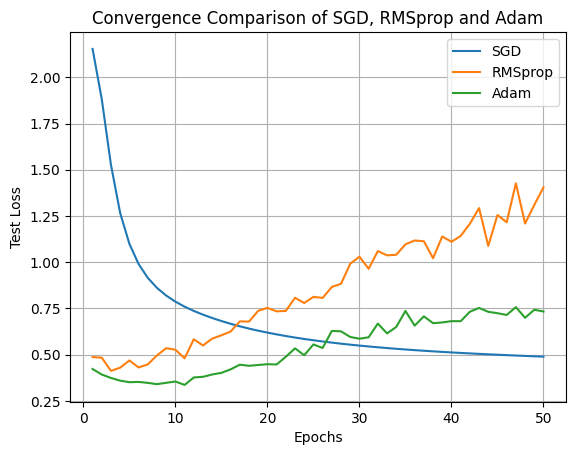

In [12]:
import matplotlib.pyplot as plt

plt.plot(range(1, EPOCHS + 1), test_loss_sgd, label='SGD')
plt.plot(range(1, EPOCHS + 1), test_loss_rms, label='RMSprop')
plt.plot(range(1, EPOCHS + 1), test_loss_adam, label='Adam')
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Convergence Comparison of SGD, RMSprop and Adam')
plt.grid(True)
plt.legend()
plt.show()

# Вывод

SGD показывает устойчивое и стабильное снижение функции потерь, достигая самого низкого значения на 50-й эпохе, что указывает на его надёжную сходимость, хотя и более медленную по сравнению с другими методами.

RMSprop быстро снижает потери на начальных этапах, но затем его функция потерь начинает расти и колебаться после примерно 20-й эпохи. Это свидетельствует о том, что RMSprop может быть менее устойчивым на длинных тренировках.

Adam на начальных этапах быстрее всех снижает потери, достигая стабильно низкого уровня. Однако его потери остаются чуть выше, чем у SGD на последних эпохах, что говорит о более быстрой, но не столь окончательной сходимости.

### Окончательный вывод
SGD достигает самых низких потерь к концу обучения, обеспечивая стабильную сходимость. Adam быстрее сходится на начальных этапах, но не достигает такого же уровня потерь, как SGD. RMSprop проявляет нестабильность на более длинных тренировках.